In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pmdarima as pm
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [101]:
train = pd.read_csv('train.csv', index_col='date')
train.index = pd.to_datetime(train.index)

In [99]:
train

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


<AxesSubplot: xlabel='date'>

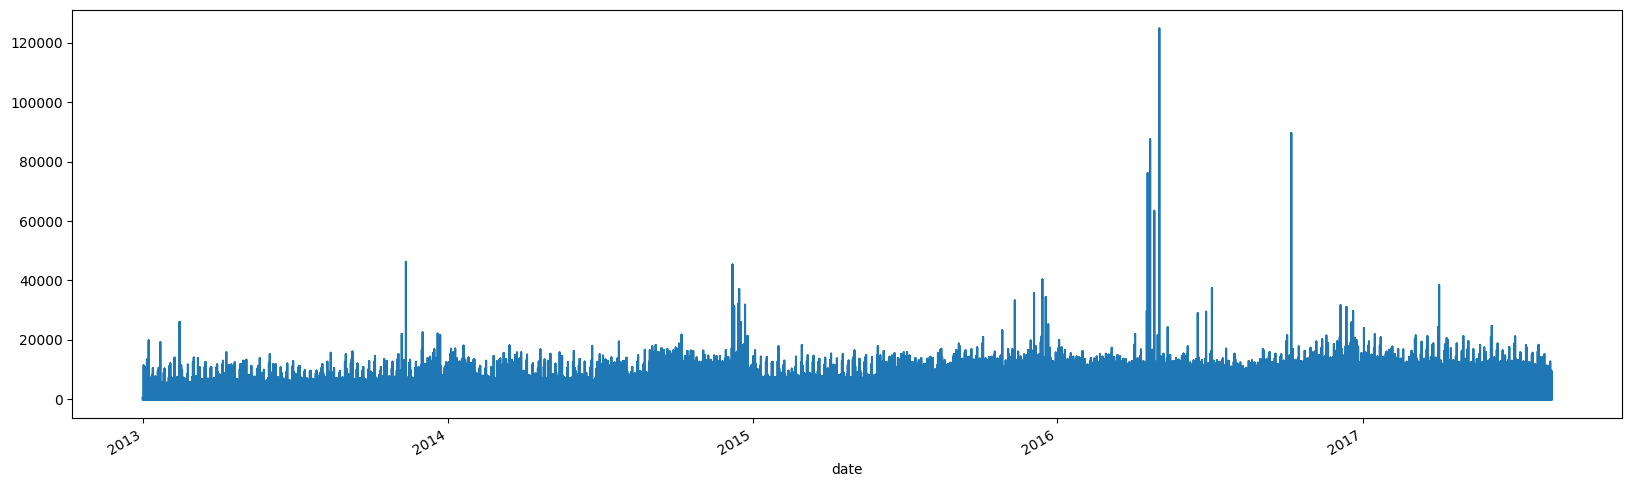

In [66]:
train['sales'].plot(figsize=(20,6))

<AxesSubplot: xlabel='date'>

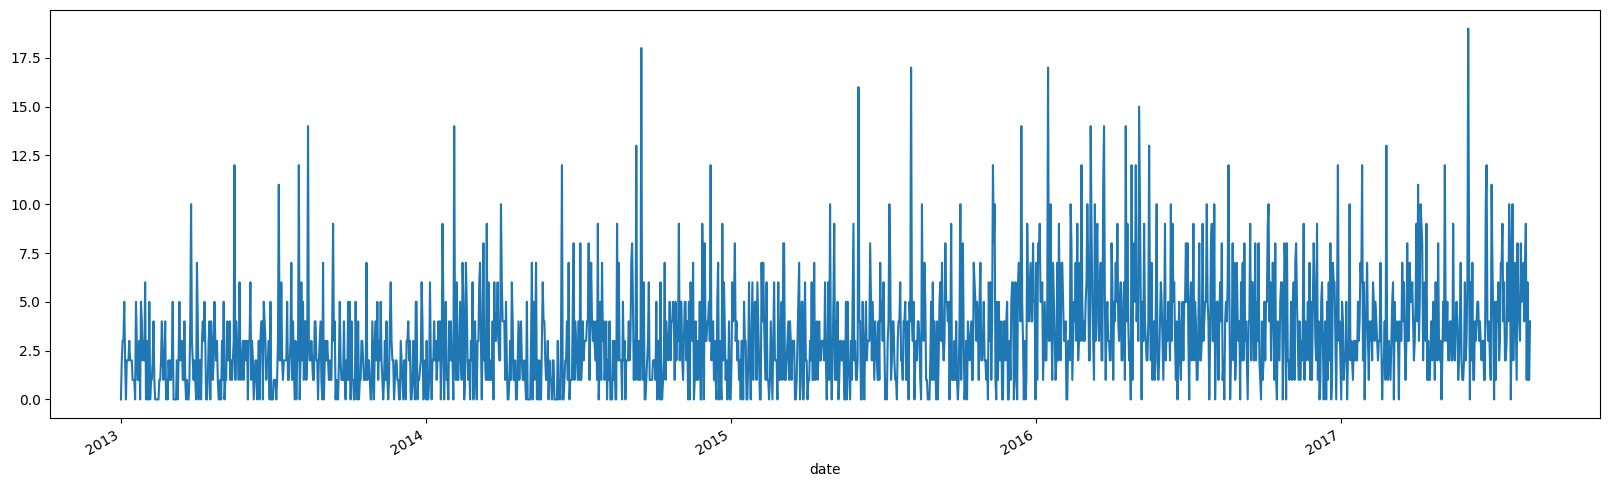

In [67]:
df = train[(train['store_nbr']==1) & (train['family']=='AUTOMOTIVE')]
df.sales.plot(figsize=(20,6))

In [68]:
df_train, df_test = train_test_split(df, test_size=0.10, random_state=5, shuffle=False)

Augmented dicky fuller test - null hypothesis is assumes the time series to non stationary, reject null if test statistic is less then critical value 
Is or not stationary, if not, take away trends, cyclicality, noise and seasonality 
Auto correlation is when a time series is correlated to its shifted self 
Create stationarity, then attempt to forecast with stationary model
Tune p, q, d
Two things: Partial auto correlation function for p, Auto-correlation function for q, d is

Research how to forecast multilabel time series 
Feature modeling

In [69]:
results = sm.tsa.stattools.adfuller(df_train.sales, autolag="AIC",regresults=True)
dfoutput = pd.Series(results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in results[2].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                                                          -3.89194
p-value                                                                 0.002095
#Lags Used                     {'1%': -3.434743423170358, '5%': -2.8634804142...
Number of Observations Used                 Augmented Dickey-Fuller Test Results
Critical Value (1%)                                                    -3.434743
Critical Value (5%)                                                     -2.86348
Critical Value (10%)                                                   -2.567803
dtype: object


Given the results, the time series for this scenario is stationary. 

/home/nasibul/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nasibul/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nasibul/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot: xlabel='date'>

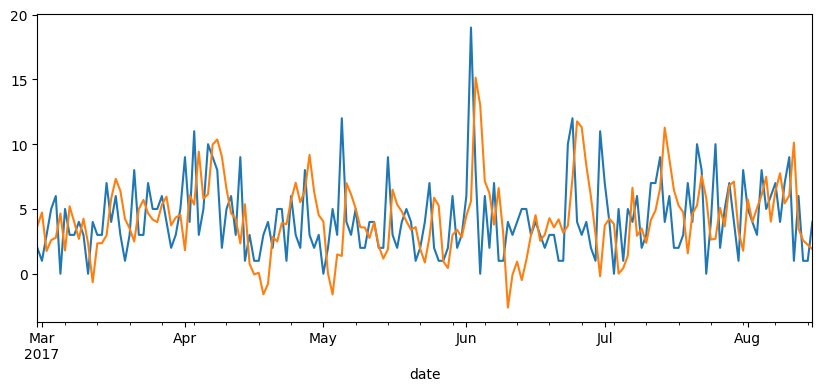

In [129]:
model = sm.tsa.arima.model.ARIMA(df.sales, order=(30, 5, 0))
model_fit = model.fit()
pred = model_fit.predict(start=len(df_train), end=len(df_train)+len(df_test)-1)
df_test.sales.plot(figsize=(10,4))
pred.plot()